In [3]:
import mysql.connector 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Connect to server 
cnx = mysql.connector.connect(
    host = "127.0.0.1",
    port = 3306,
    user = "root",
    password = "prashant@45"
    
)

In [4]:
query = "SELECT * FROM banking_case.CUSTOMER"

In [5]:
df = pd.read_sql(query, cnx)

C:\Users\Asus\AppData\Local\Temp\ipykernel_18628\1600954950.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [6]:
cnx.close()

In [7]:
df.head(5)

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [8]:
df.rename(columns={'ï»¿Client ID': 'Client ID'}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [10]:
df.isnull().sum()

Client ID                   0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
dtype: int64

In [11]:
df['Client ID'].duplicated().sum()

60

In [12]:
df = df.drop_duplicates(subset = 'Client ID', keep = 'first')

In [13]:
df['Client ID'].duplicated().sum()

0

In [14]:
## Generate descriptive Statistics for the Dataframe 

df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2940.000000,2.940000e+03,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,51.052721,21556.638776,171474.564701,25537.537588,1.464286,3174.061119,5.929354e+05,6.696077e+05,3.196736e+05,2.325065e+05,29924.059065,8.663040e+05,1.518707,2.249660,2.556463,1.505782,10.420408
std,19.865992,12452.561124,112256.335403,16293.994988,0.675546,2499.212657,4.586359e+05,6.458076e+05,2.812101e+05,2.302543e+05,23169.058451,6.401003e+05,1.101821,1.130894,1.009251,0.500052,5.974096
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82742.115000,12506.737500,1.000000,1231.735000,2.396281e+05,2.042351e+05,1.193008e+05,7.444691e+04,11927.090000,3.753972e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21147.500000,142313.480000,22371.550000,1.000000,2560.165000,4.821348e+05,4.590371e+05,2.417221e+05,1.634431e+05,24316.860000,7.115343e+05,2.000000,2.000000,3.000000,2.000000,10.500000
75%,69.000000,31985.750000,242817.330000,35476.867500,2.000000,4522.632500,8.295056e+05,9.414633e+05,4.338220e+05,3.136847e+05,42027.797500,1.183531e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,521159.980000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [15]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins =bins, labels =labels, right=False )
print(df['Income Band'])

0        Low
1        Med
2        Med
3       High
4        Med
        ... 
2995     Med
2996     Low
2997     Low
2998     Med
2999     Low
Name: Income Band, Length: 2940, dtype: category
Categories (3, object): ['Low' < 'Med' < 'High']


<Axes: xlabel='Income Band'>

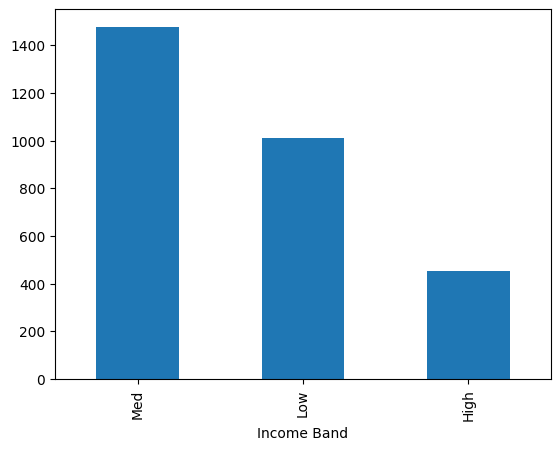

In [16]:
df['Income Band'].value_counts().plot(kind='bar')

In [17]:
## Examine the distibution of unique categories in categorical columns 

categorical_cols = df[["BRId", "GenderId", "Amount of Credit Cards", "Nationality","Occupation", 
                        "Fee Structure", "Loyalty Classification", "Income Band", "Properties Owned", "Risk Weighting", "IAId"]].columns

for col in categorical_cols:
    print(f"Value counts for ",{col},":")
    display (df[col].value_counts())

Value counts for  {'BRId'} :


BRId
3    1318
1     650
2     488
4     484
Name: count, dtype: int64

Value counts for  {'GenderId'} :


GenderId
2    1487
1    1453
Name: count, dtype: int64

Value counts for  {'Amount of Credit Cards'} :


Amount of Credit Cards
1    1880
2     755
3     305
Name: count, dtype: int64

Value counts for  {'Nationality'} :


Nationality
European      1283
Asian          744
American       494
Australian     245
African        174
Name: count, dtype: int64

Value counts for  {'Occupation'} :


Occupation
Structural Analysis Engineer    26
Associate Professor             26
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value counts for  {'Fee Structure'} :


Fee Structure
High    1441
Mid      944
Low      555
Name: count, dtype: int64

Value counts for  {'Loyalty Classification'} :


Loyalty Classification
Jade        1304
Silver       754
Gold         574
Platinum     308
Name: count, dtype: int64

Value counts for  {'Income Band'} :


Income Band
Med     1477
Low     1012
High     451
Name: count, dtype: int64

Value counts for  {'Properties Owned'} :


Properties Owned
1    762
2    761
3    727
0    690
Name: count, dtype: int64

Value counts for  {'Risk Weighting'} :


Risk Weighting
2    1200
1     818
3     448
4     318
5     156
Name: count, dtype: int64

Value counts for  {'IAId'} :


IAId
8     176
13    176
15    175
11    175
1     174
12    174
4     174
2     173
14    173
9     172
3     172
10    170
7      87
18     87
6      86
5      86
19     86
22     86
17     85
20     85
16     84
21     84
Name: count, dtype: int64

## Univariate Analysis

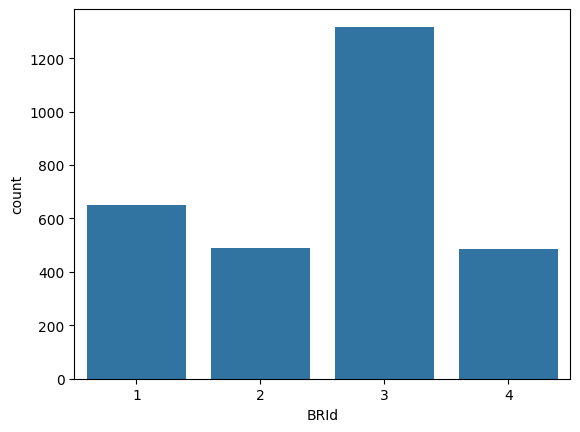

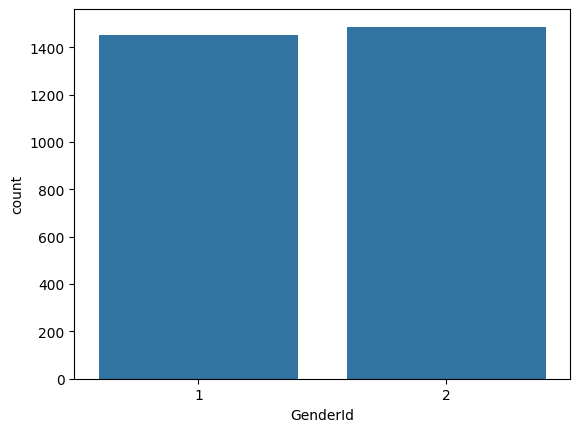

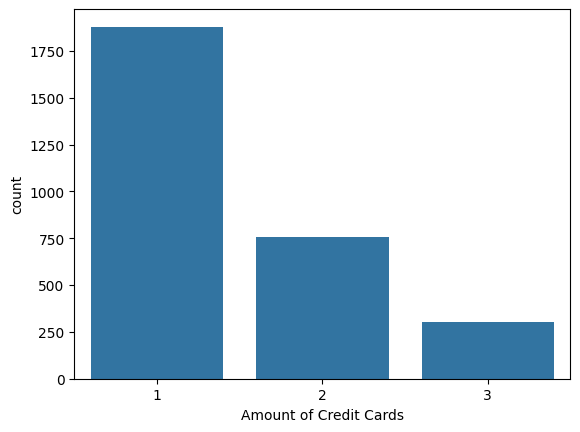

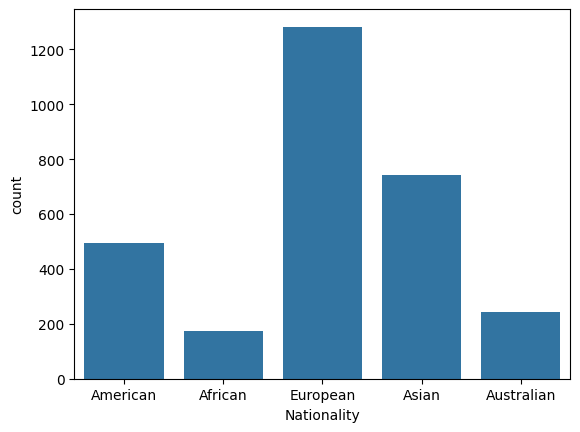

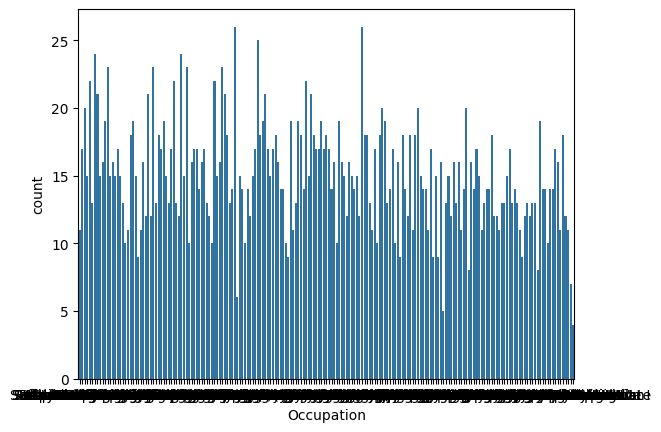

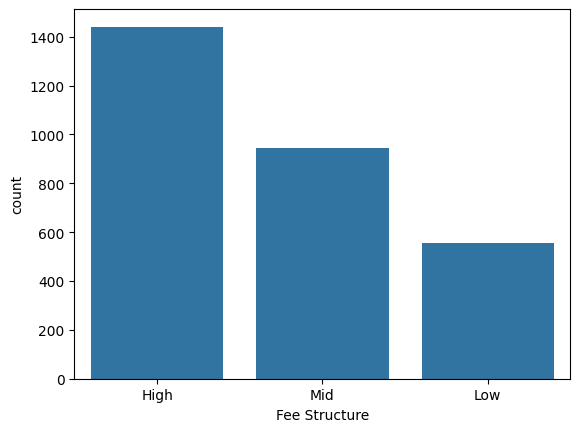

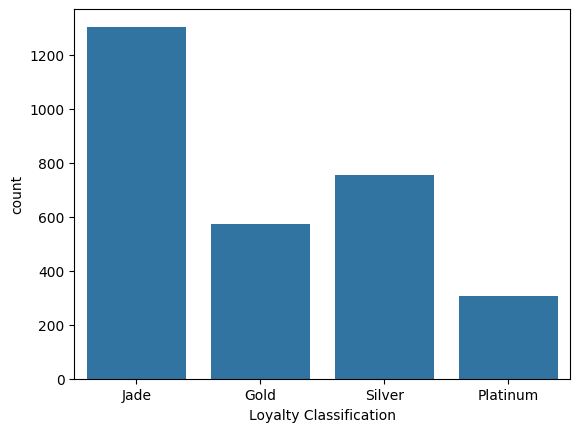

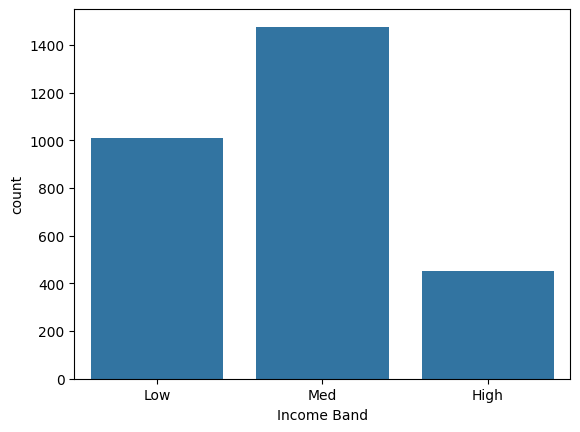

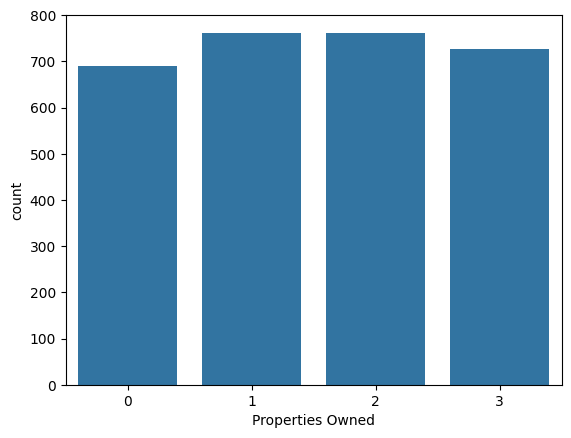

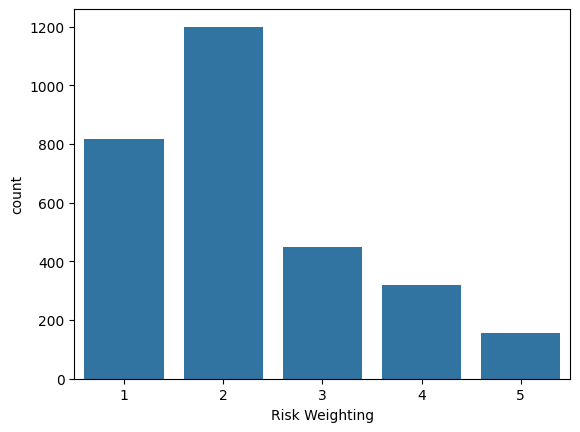

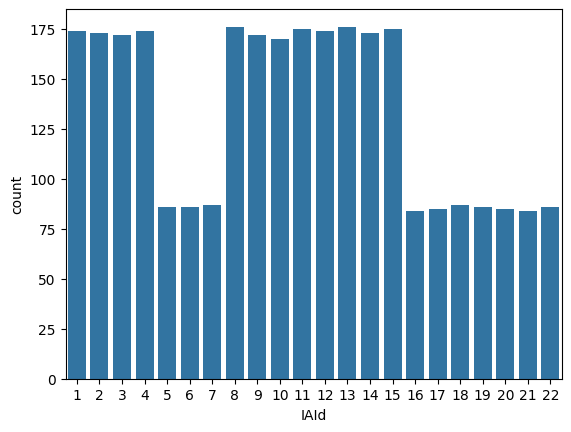

In [18]:
for i, predictor in enumerate (df[["BRId", "GenderId", "Amount of Credit Cards", "Nationality","Occupation", 
                        "Fee Structure", "Loyalty Classification", "Income Band", "Properties Owned", "Risk Weighting", "IAId"]]):
    plt.figure(i)
    sns.countplot(data=df, x = predictor)
    

## Bivariate Analysis

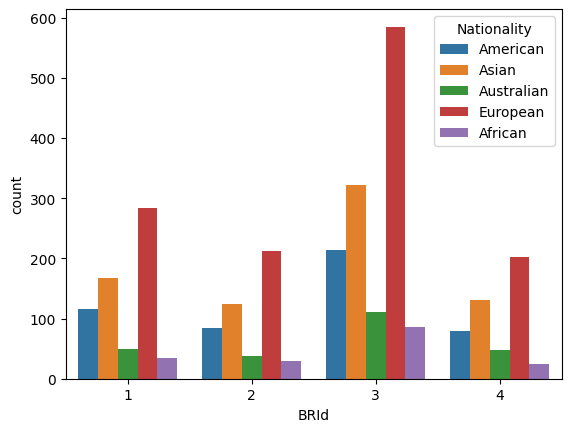

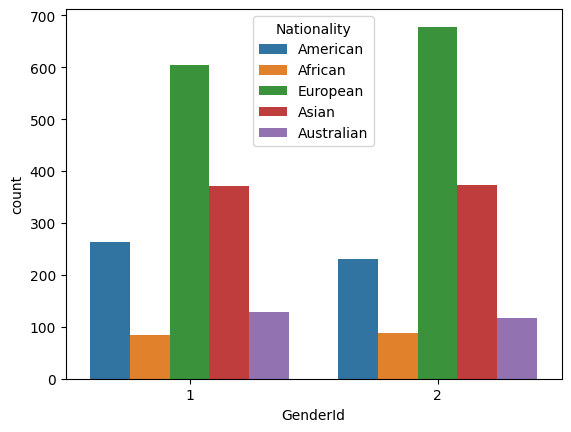

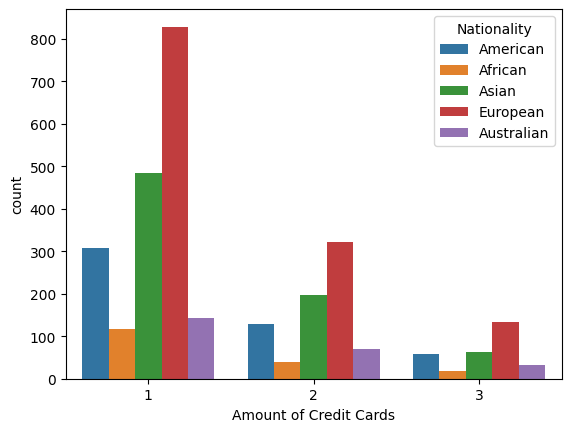

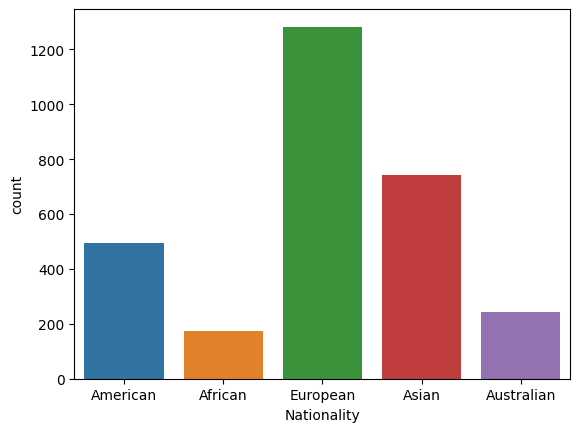

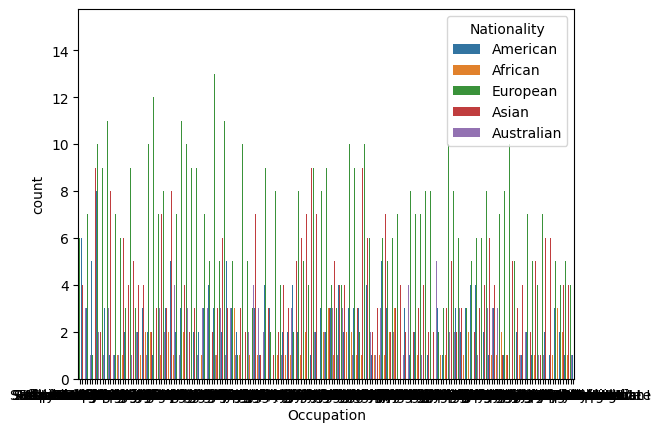

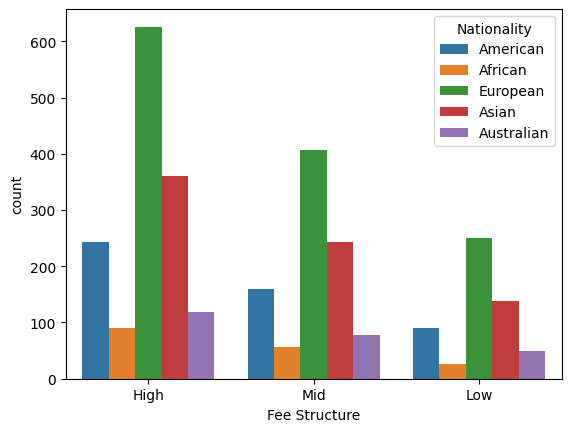

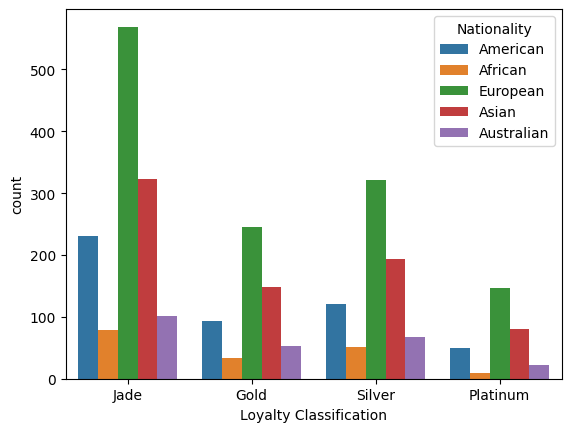

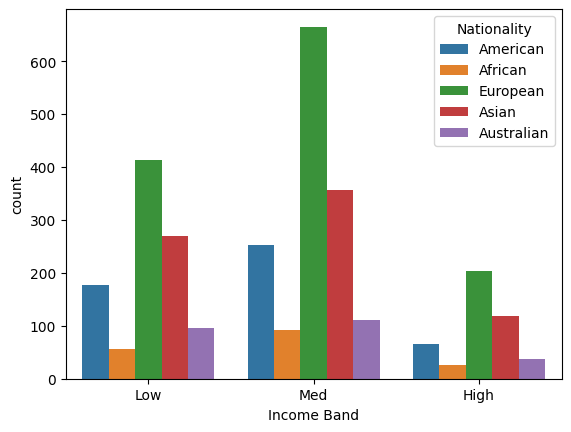

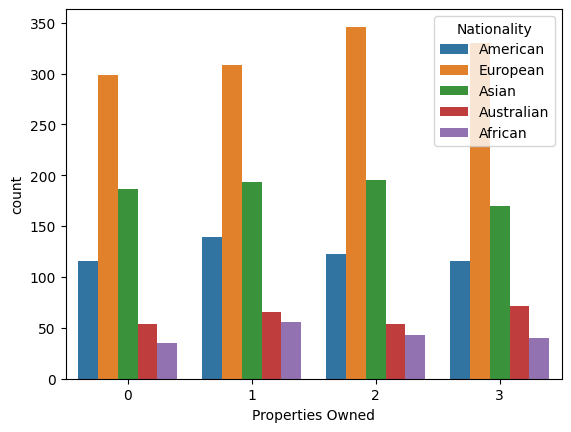

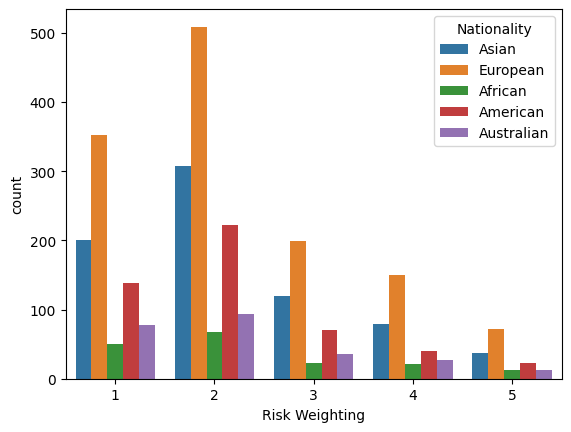

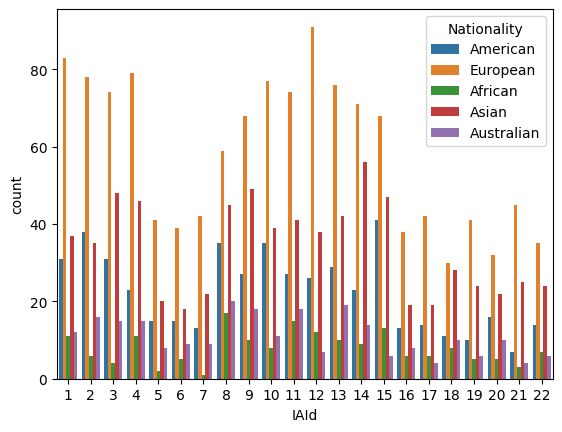

In [19]:
for i, predictor in enumerate (df[["BRId", "GenderId", "Amount of Credit Cards", "Nationality","Occupation", 
                        "Fee Structure", "Loyalty Classification", "Income Band", "Properties Owned", "Risk Weighting", "IAId"]]):
    plt.figure(i)
    sns.countplot(data = df,x=predictor,hue = 'Nationality')

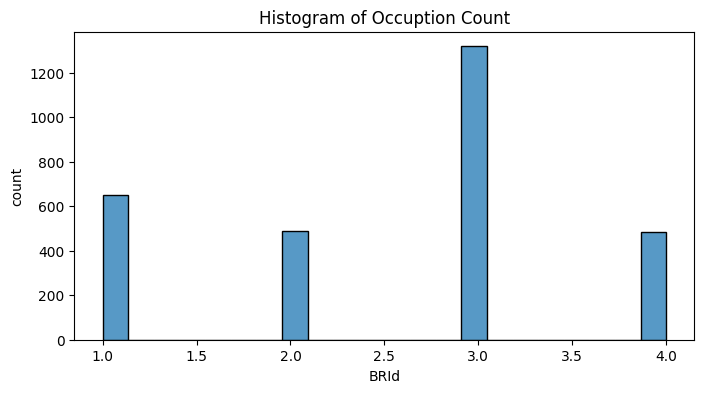

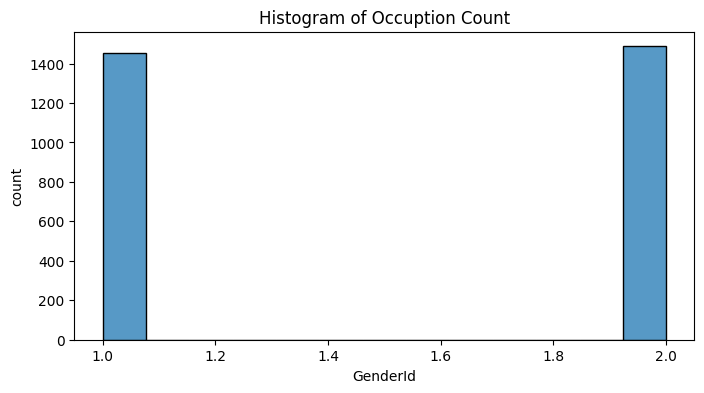

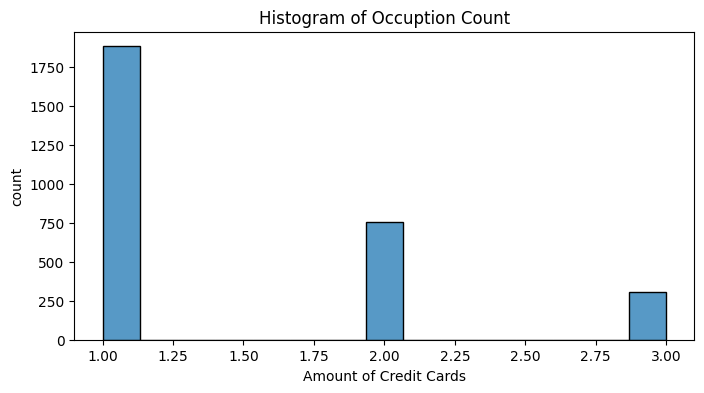

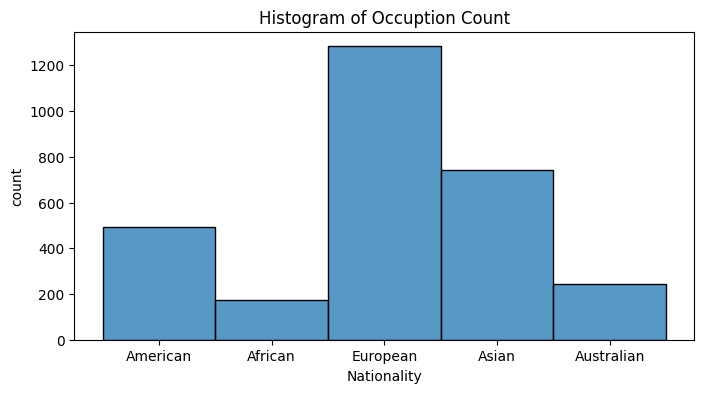

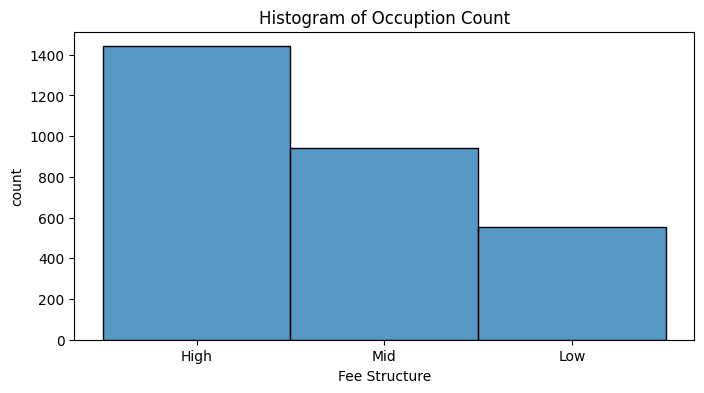

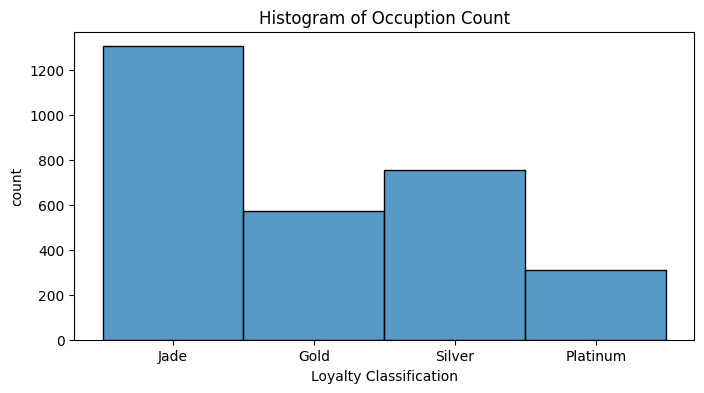

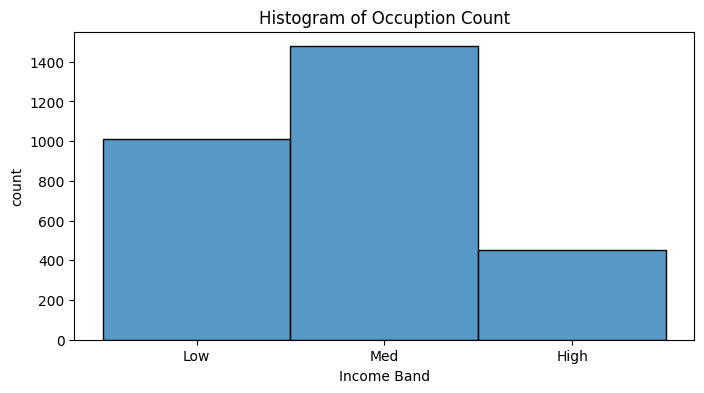

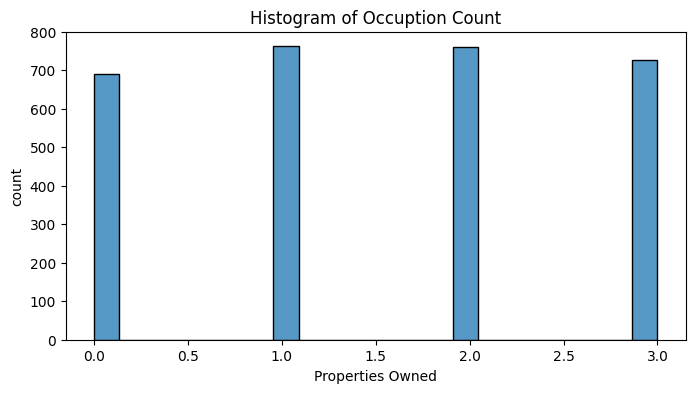

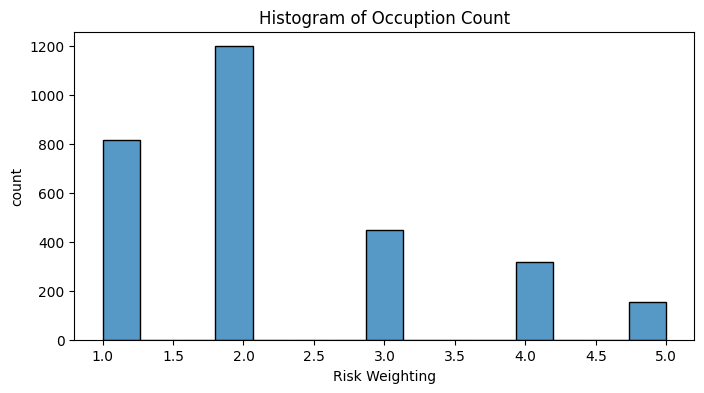

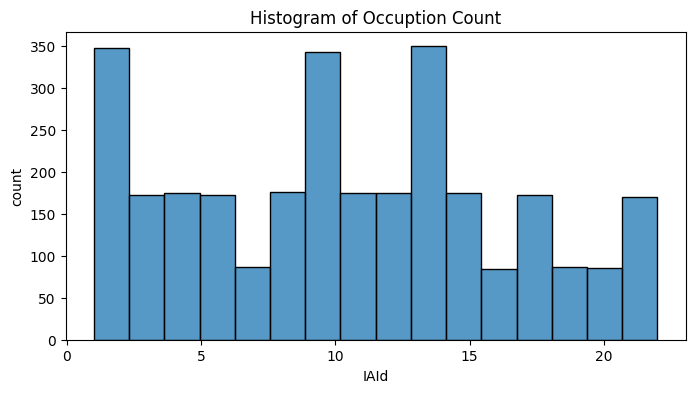

In [20]:
for col in categorical_cols:
    if col == 'Occupation':
        continue;
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title("Histogram of Occuption Count")
    plt.xlabel(col)
    plt.ylabel("count")

## Numnerical Analysis

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2940 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Client ID                 2940 non-null   object  
 1   Name                      2940 non-null   object  
 2   Age                       2940 non-null   int64   
 3   Location ID               2940 non-null   int64   
 4   Joined Bank               2940 non-null   object  
 5   Banking Contact           2940 non-null   object  
 6   Nationality               2940 non-null   object  
 7   Occupation                2940 non-null   object  
 8   Fee Structure             2940 non-null   object  
 9   Loyalty Classification    2940 non-null   object  
 10  Estimated Income          2940 non-null   float64 
 11  Superannuation Savings    2940 non-null   float64 
 12  Amount of Credit Cards    2940 non-null   int64   
 13  Credit Card Balance       2940 non-null   float64 
 1

In [22]:
Numerical_cols = df[['Estimated Income','Superannuation Savings','Credit Card Balance',
                     'Checking Accounts','Bank Loans','Bank Deposits','Saving Accounts','Foreign Currency Account','Business Lending']]

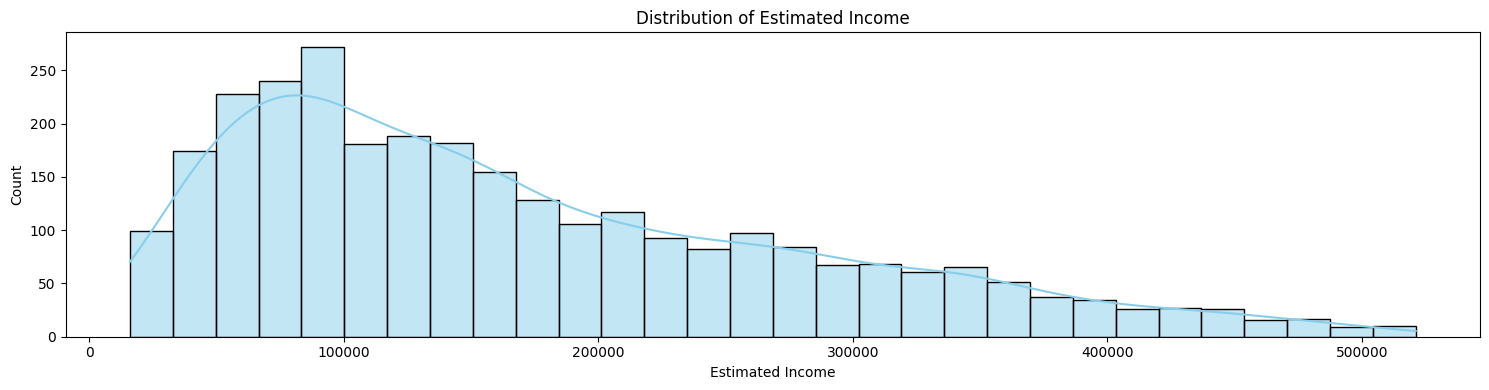

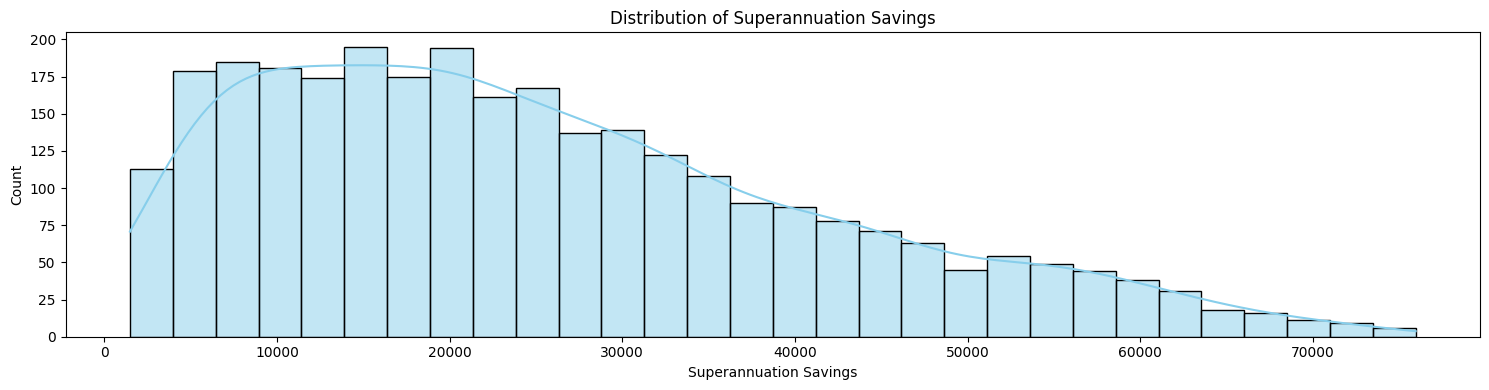

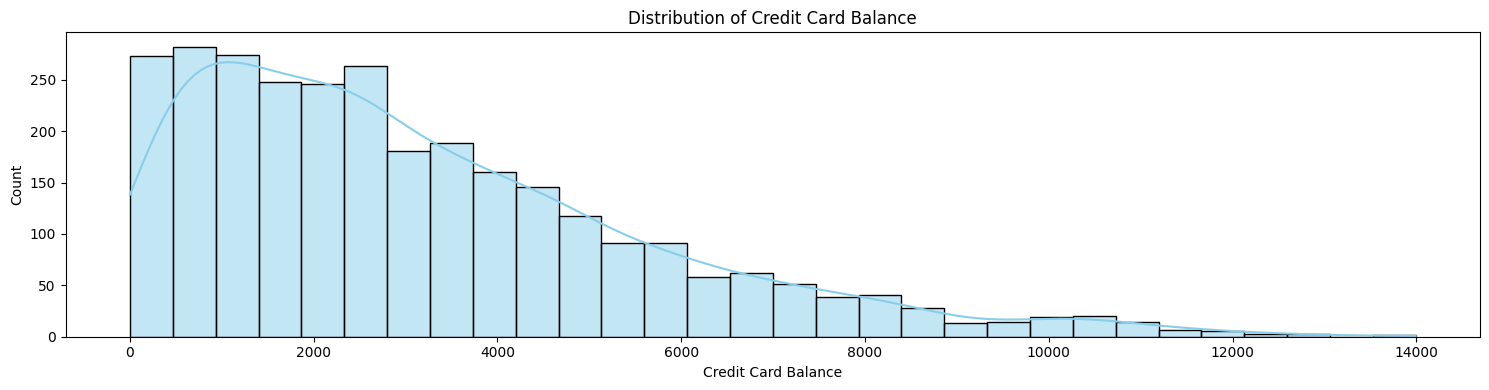

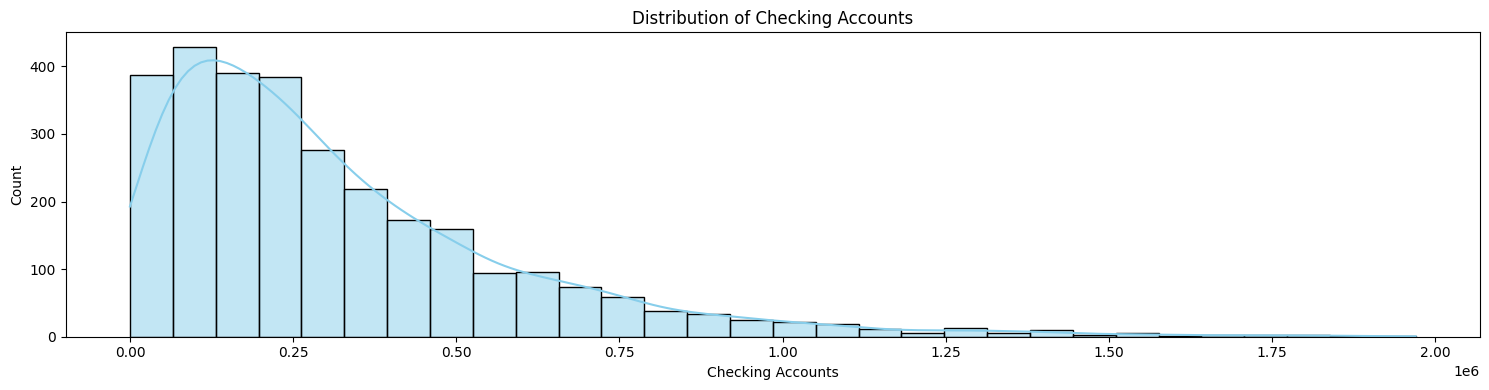

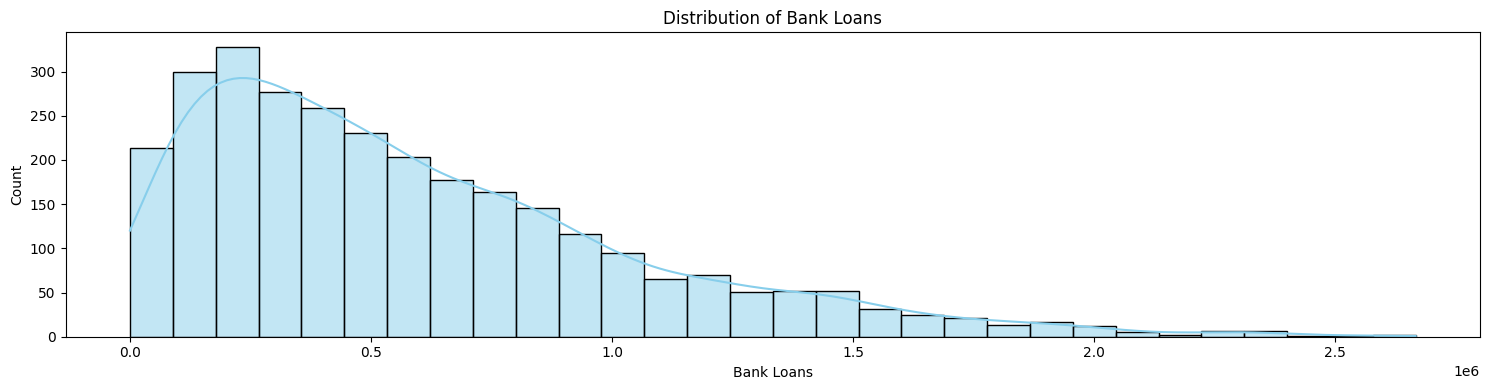

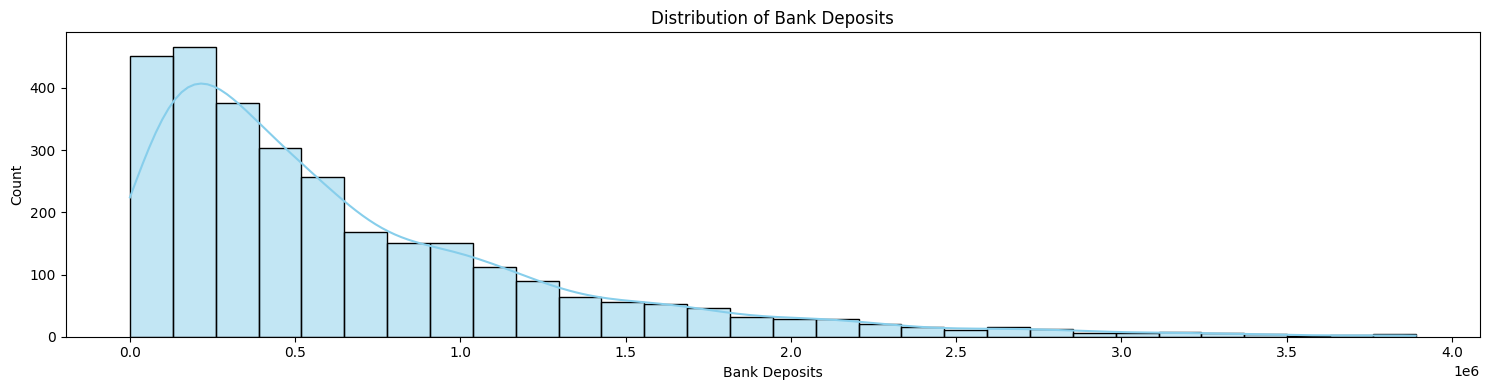

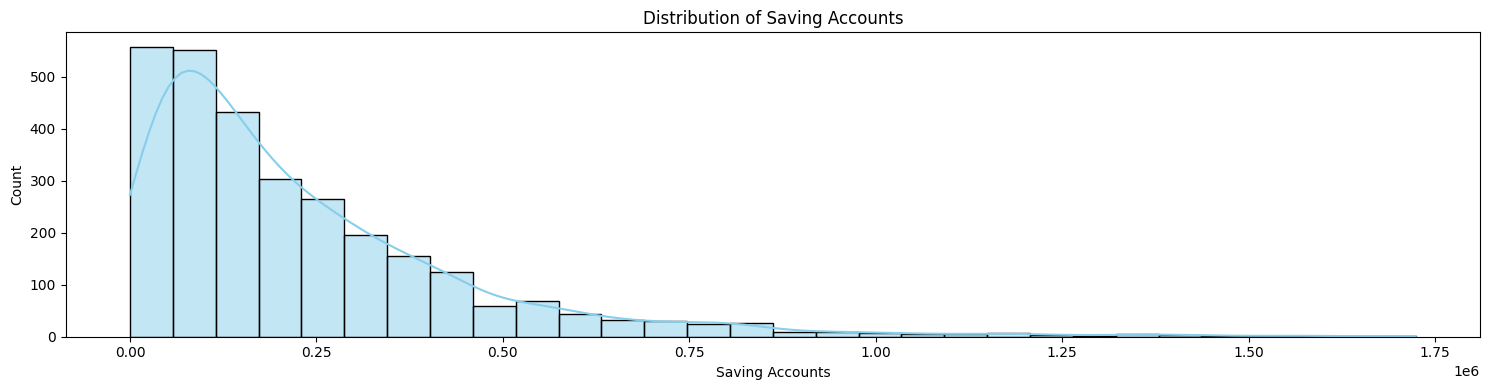

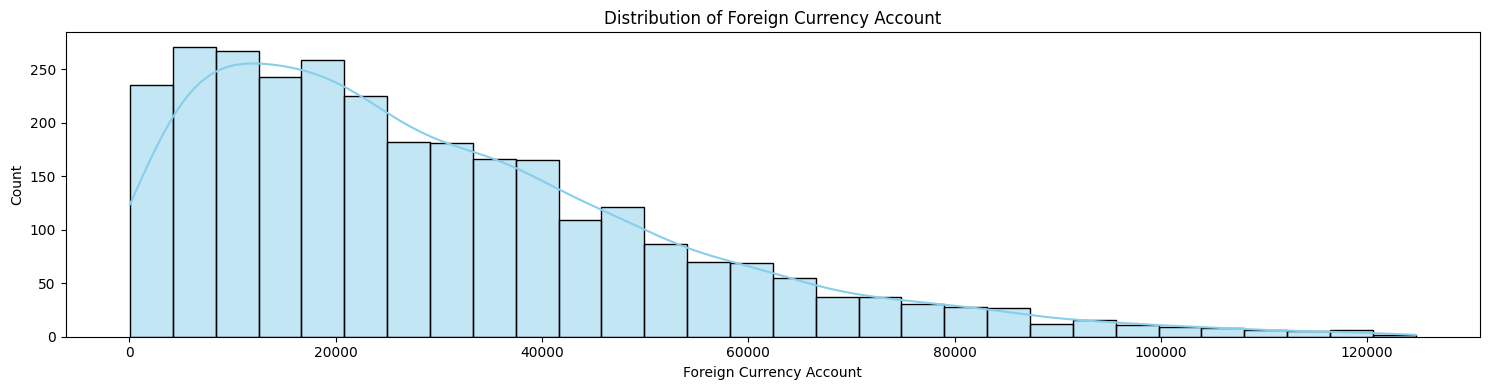

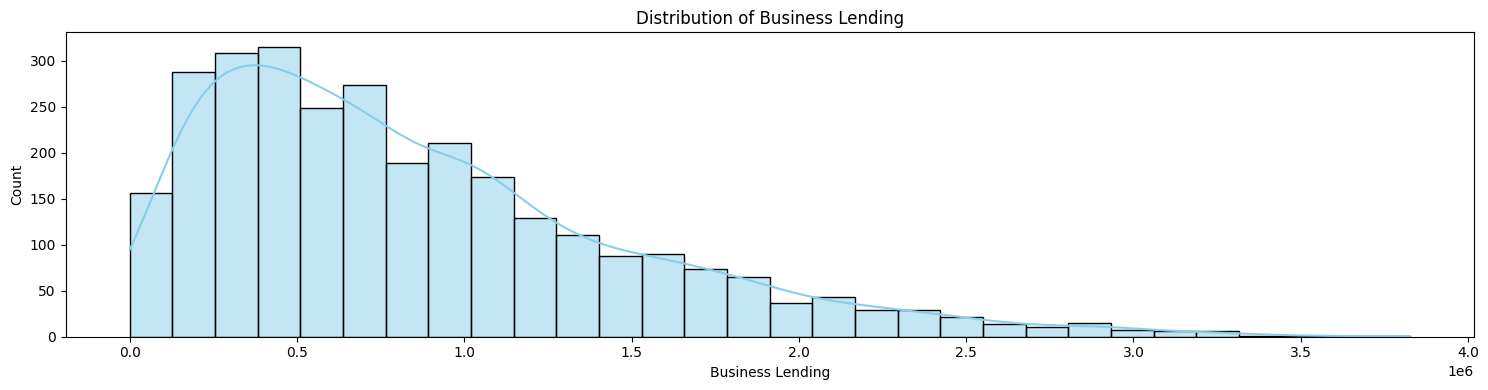

In [23]:
## Univariate Analysis and Visualixzartion


for i, col in enumerate(Numerical_cols):
    plt.figure(figsize=(15,4))
    
    sns.histplot(df[col],kde=True,bins =30,color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

## Heatmaps

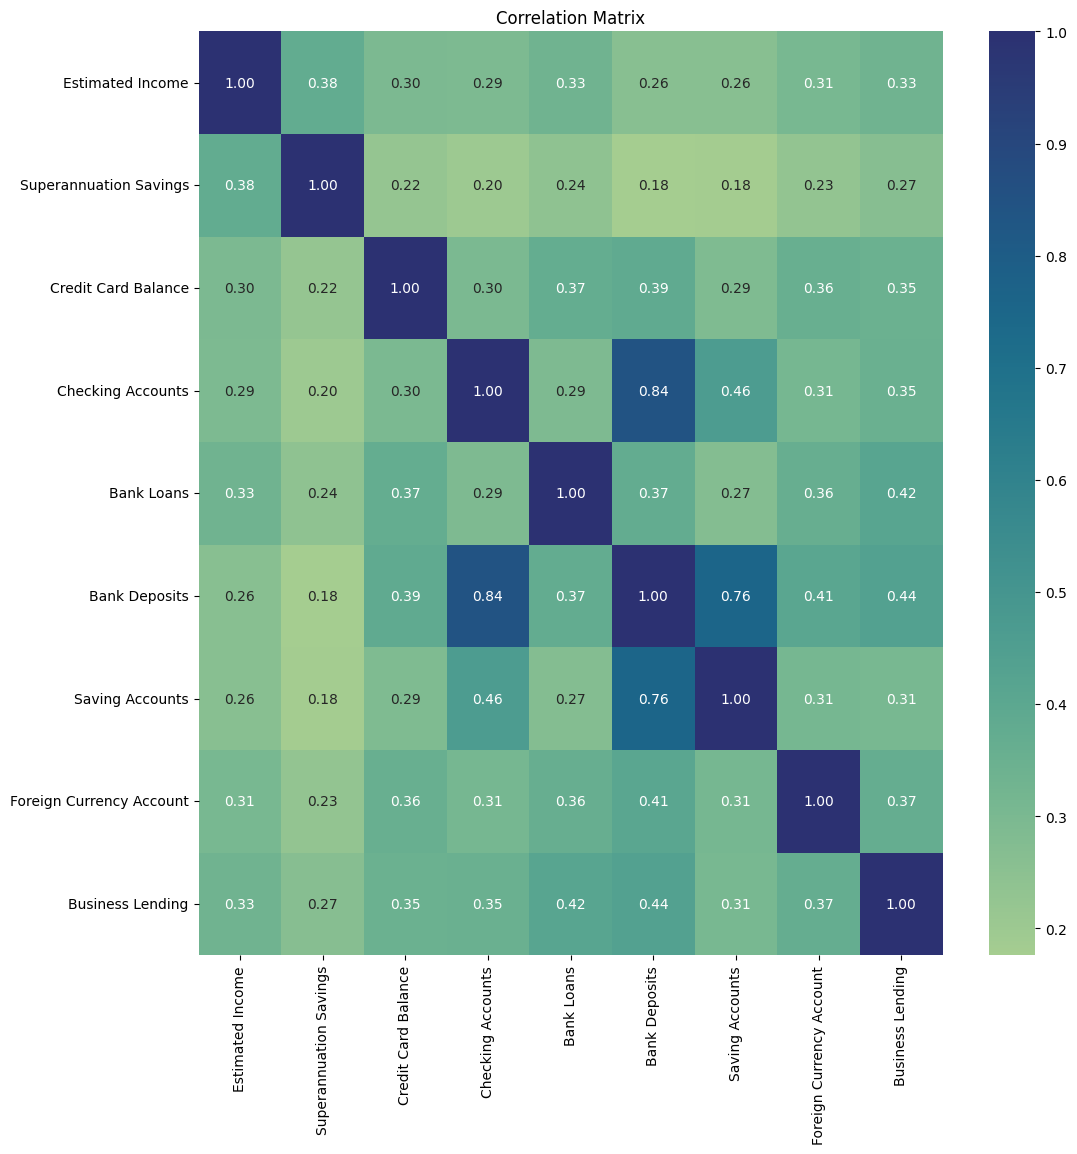

In [24]:

Numerical_cols = df[['Estimated Income','Superannuation Savings','Credit Card Balance',
                     'Checking Accounts','Bank Loans','Bank Deposits','Saving Accounts',
                     'Foreign Currency Account','Business Lending']]

# Compute correlation matrix
correlation_matrix = Numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Inside of EDA

1. The strongest positive correlation occur among "Bank opposits" with
'Checking Accounts',"Saving Accounts", and "Foreign Currency Accounts" 
indicating that customers who maintain high balance is one account type often 
hold substantial amount/funds across other accounts as well.